---

Universidade Federal do Rio Grande do Norte

Centro de Tecnologia

Departamento de Engenharia Elétrica

DCA0305 - PROJETO DE SISTEMAS BASEADOS EM APRENDIZADO DE MÁQUINA

Discentes: 

- Arthur França Pessoa da Cunha Lima
- Thiago Maia Souto
- Vinícius Albuquerque Malafaya

Título: **Práticas de MLOps**

---

# Introdução

O Trabalho a seguir apresentará a metodologia utilizada e resultados obtidos na análise da base de dados Bank Marketing Data Set. Com isso, realizou-se a extração dos dados e em seguida uma análise exploratória, identificando tipos de variáveis, retirando dados duplicados e categorizando os dados. Além disso o modelo de Machine Learning utilizado foi o SVM e, por fim foi feita a validação dos modelos.

## Conjunto de dados

### O Dataset 

O dataset Bank Marketing Data Set, utilizado nesse projeto, foi desenvolvido por pesquisadores da ISCTE - University Institute of Lisboa, e publicado no artigo "A data-driven approach to predict the success of bank telemarketing" no Journal Decision Support Systems, no ano de 2014. O dataset traz dados relacionados a campanhas de marketing de bancos de Portugal, movimento que vem aumentado nos ultimos anos, visando atrair novos clientes para as companhias bancárias com base no marketing de midias sociais usando novas estratégias midiaticas e de marketing digital. 

O cojunto de dados tem como prioridade a análise do perfil dos clientes e a forma como a campanha foi disseminada entre eles, sendo possível verificar e extrair informações importantes para futuras campanhas. É importante observar que as campanhas de marketing realizadas nessa coleta foram baseadas em telefonemas, em que em alguns casos fez-se necessário mais de um contato com um mesmo cliente, e foi criada uma base de dados com as informações coletadas e a resposta do cliente. O objetivo final desse dataset é poder classificar um cliente com base na realização de um depósito bancário à prazo naquela companhia ou não. 

### Resumo do Dataset

O dataset tem 4 agrupamentos de dados para serem relacionados e analisados. São eles:
  

 

- **Dados do cliente do banco**: dados relacionados ao cliente, como idade, trabalho, status de relacionamento, educação, quantidade de crédito com aquele banco e possiveis casas ou emprestimos financiados.

- **Dados de comunicação**: dados relacionados com o contato banco-cliente, como o método do último contato (celular ou telefone residencial), o mês, o dia da semana e a duração.

- **Dados de campanha**: dados relacionados a última campanha bancária, como o tempo entre a última e atual campanha entre cada cliente, o numero de dias da última campanha, número de ligações realizadas na última campanha e entre cada cliente e a taxa de sucesso e rejeição das últimas campanhas.

- **Dados econômicos e culturais**: dados relacionados ao contexto econômico e social no país o qual é realizado aquela campanha, nesse caso, Portugal. Aqui se enquadram dados como o número de empregados, o número de preços do consumidor (utilizado no estudo inflacionário), o número de confiança do consumidor (utilizado na análise de confiança do consumidor com a economia do país), o euribor (taxa de relevância monetária na zona do euro, a qual engloba Portugal) e o a variação de empregos no país.



 E por fim temos o dado de saída relacionado a aceitabilidade e ao sucesso da campanha bancária com determinado cliente, sendo armazenados dados "sim" ou "não" para o resultado daquela campanha para aquele cliente específico.

### Variáveis

### Dados do cliente bancário

1.   **age** : idade do cliente (valor numérico)
2.   **job** : tipo de emprego do cliente (categorias: 'admin', 'blue-collar', 'entrepreneur', 'housemaid',   'management', 'retired', 'self-employed', 'services',  'student', 'technician', 'unemployed', 'unknown')
3.   **marital** : status de relacionamento do cliente (categorias: 'divorced', 'married', 'single', 'unknown'; note: 'divorced' means divorced or widowed)
4.   **education** : nivel educacional do cliente (categorias: 'basic.4y', 'basic.6y', 'basic.9y', 'high.school', 'illiterate', 'professional.course', 'university.degree', 'unknown')
5.   **default**: o cliente tem créditos com a companhia? (categorias: 'no', 'yes', 'unknown')
6.   **balance**: saldo bancário do cliente
7.   **housing**: o cliente tem empréstimo residencial? (categorias: 'no','yes','unknown')
8.   **loan**: o cliente tem empréstimo pessoal? (categorias: 'no','yes','unknown')

### Relacionado ao último contato da atual campanha (Dados de comunicação):

9.   **contact**: tipo de comunicação com o cliente no último contato (categorias: 'cellular','telephone')
10.   **month**: mês do último contato (categorias: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
11.  **day_of_week**: dia da semana no último contato (categorias: 'mon','tue','wed','thu','fri')
12.  **duration**: duração do último contato, em segundos (valor numérico). 

### Dados de campanha:
13.   **campaign**: número de vezes que houve ligações durante esta campanha e para determinado cliente (valor numérico, incluindo o último contato)
14.   **pdays**: número de dias que se passou desde o último contato com o cliente na última campanha (valor numeéico; obs: o valor 999 significa que o cliente não foi contatado antes)
15.   **previous**: número de contatos realizados antes da campanha para este cliente (valor numérico)
16.   **poutcome**: resultado da última campanha de marketing com este cliente (categorias: 'failure','nonexistent','success')

### Variável de saída (alvo desejado):
17.   **y** - O cliente se dispõe a realizar a operação de depósito à prazo?" (valores possíveis: 'yes','no')


Observação Importante: o dado **duration** afeta diretamente a variável de saída **y**, uma vez que caso a duração da chamada seja 0, a ligação não foi atendida, ou seja, o cliente não atribui crédito aquele banco. Então, a duração da chamada não é conhecida antes dela acontecer, mas depois da chamada ocorrer haverá um valor para **y** para atribuição de créditos aquele banco. Portanto, o dado de entrada **duration** só deve ser incluido na análise de dados caso queira realizar um modelo de análise preditiva realista.

# Metodologia

## Setup 

### Importando as bibliotecas necessárias

As principais bibliotecas a serem utilizadas durante o projeto são importadas a seguir. No caso de ser necessária a importação de mais bibliotecas ou funções, elas serão importadas a medida que forem necessárias.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Por motivos de organização todos os plots realizados no projeto seguirão o mesmo tema, sendo ele o **darkgrid** da biblioteca **seaborn**.

In [2]:
sns.set_style('darkgrid')

### Baixando os dados 

Tendo em vista que os dados estão contidos no Google Drive, será necessário baixá-los para em seguida carregá-los em um Dataframe. Para isso é utilizado o seguinte trecho de código:

In [3]:
# Baixando o conjunto de dados do Google Drive
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1AtKo0u4r251RvZYkUAFtGoA3UAw3AbhH' -O bank-full.csv

--2022-02-19 03:52:15--  https://docs.google.com/uc?export=download&id=1AtKo0u4r251RvZYkUAFtGoA3UAw3AbhH
Resolving docs.google.com (docs.google.com)... 173.194.214.102, 173.194.214.113, 173.194.214.101, ...
Connecting to docs.google.com (docs.google.com)|173.194.214.102|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0o-2c-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/na9sk6buuhfemmqrhldm91bmhm88g1nb/1645242675000/04098547160699396490/*/1AtKo0u4r251RvZYkUAFtGoA3UAw3AbhH?e=download [following]
--2022-02-19 03:52:16--  https://doc-0o-2c-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/na9sk6buuhfemmqrhldm91bmhm88g1nb/1645242675000/04098547160699396490/*/1AtKo0u4r251RvZYkUAFtGoA3UAw3AbhH?e=download
Resolving doc-0o-2c-docs.googleusercontent.com (doc-0o-2c-docs.googleusercontent.com)... 108.177.12.132, 2607:f8b0:400c:c08::84
Connecting to doc-0o-2c-docs.googleusercontent.com (doc-0o-2c-docs.

### Carregando o conjunto de dados

Uma vez que o arquivo *.CSV* do conjunto de dados já foi baixado no ambiente do notebook ele pode ser carregado em uma **Dataframe** da seguinte forma:

In [4]:
df = pd.read_csv('/content/bank-full.csv', delimiter= ';')

Com o intuito de realizar uma breve observação dos dados, a seguir são printadas as primeiras cinco linhas do dataset.

In [5]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


Além disso é importante saber a quantidade de linhas (amostras) e colunas (variáveis) no dataframe. Isso pode ser obtido a partir do código a seguir

In [6]:
df.shape

(45211, 17)

Como pode ser visto acima, o dataframe consiste de $45211$ amostras e $17$ colunas.

## Análise Exploratória de Dados

### Identificação dos tipos de variáveis

O primeiro passo na análise de dados exploratória é determinar os tipos **(dtypes)** de cada coluna para determinar o tipo de variável que ela representa

In [7]:
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

A partir da saída obtida acima é possível notar que as colunas consistem apenas de dois tipos de dados **int64**, o qual representa números inteiros e **object**, o qual representa dados textuais (ou categóricos). Algo interessante a ser analisado nas etapas futuras é verificar a distribuição dos dados para verificar se o tipo de dado inferido durante o carregamento do dataset pelo **pandas** é o mais adequado.

Uma vez tendo obtido o tipo de cada coluna é interessante separá-las de acordo com o tipo de variável, sendo elas categoricas e numéricas. Isso pode ser feito armazenando os nomes das colunas de cada tipo em listas da seguinte forma:

In [8]:
# Obtendo o nome das colunas com dados numéricos
colunas_numericas = df.select_dtypes(include = np.number).columns.to_list()
colunas_numericas

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

In [9]:
# Obtendo o nome das colunas com dados categóricos
colunas_categoricas = df.select_dtypes(include= np.object).columns.to_list()
colunas_categoricas

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome',
 'y']

### Verificar dados faltantes ou duplicados

Outro passo fundamental na etapa de Análise exploratória é verificar se há dados faltantes ou duplicados na base de dados, o que pode ser feito conforme abaixo

In [10]:
# Verificando se existem linhas duplicadas no dataframe
df.duplicated().any()

False

Como pode ser visto acima, não existem linhas duplicadas no conjunto de dados utilizados. Já a verificação por dados faltantes é feita a seguir.

In [11]:
# Verificando se existem valores faltantes nas colunas do dataframe
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

Como pode ser visto acima, não existem dados faltantes em nenhuma das colunas. Embora aparentemente não existam dados faltantes é interessante ressaltar que a utilização da função **isnull()** só é capaz de verificar se existem valores do tipo **NaN** em variáveis numéricas e categóricas, **None** em variáveis categóricas e **NaT** em variáveis do tipo data. Com isso, percebe-se que dependendo da forma do dado faltante, pode ser que ele não seja percebido por esse método, como exemplo a existência de valores nulos ou strings vazias, o que só será perceptível durante a análise individual de cada coluna. Isso pode ser demonstrado a seguir

In [12]:
# Verificando saída da função isnull para valores zero, strings vazias ou string com X
pd.isnull(["", 0, "X"])

array([False, False, False])

Como dito anteriormente, a função retornou **False** para todos os casos testados, indicando que dependendo da forma do dado faltante será necessário outro tipo de análise para identificá-los.

### Obtendo dados das colunas numéricas

Visto que as colunas do conjunto de dados já foram separados em numéricas e categóricas é de extrema importância obter estatísticas descritivas assim como histogramas que representem as colunas numéricas. Com o objetivo de reutilização de código, as seguintes funções foram implementadas de forma que possam extrair as informações necessárias:

Algumas das estatísticas interessantes para as colunas numéricas são:
- Média
- Moda
- Mediana
- Desvio-padrão
- Valor máximo
- Valor mínimo
- Valores únicos
- Curtose
- Assimetria
- Quantis

Uma vez que a função **describe()** já retorna várias das estatísticas necessárias, ela será usada como base para a função a seguir

In [13]:
def obter_estatisticas_numericas(dataframe, coluna):
  """
    Função responsável pela obtenção das principais estatísticas de uma coluna
    específica do dataframe

    Args:
        dataframe (pandas.DataFrame) : Dataframe contendo o conjunto de dados a ser avaliado
        coluna (str) : Nome da coluna do Dataframe a ser analisada
    
    Returns:
        estatisticas (pandas.Dataframe) : Dataframe contendo todas as estatisticas
                                           relevantes da coluna especificada

  """

  # Criação de uma lista de colunas para armazenar as estatísticas
  estat_cols = ['Media', "Desvio_Padrao", "Moda",  
                "Minimo", "25%", "50%", "75%", "Maximo", "Valores_Unicos", 
                "Qtd_Zeros", "Curtose","Assimetria"]

  # Obtém estatísticas básicas através da função describe e armazena em um dataframe
  estatisticas = pd.DataFrame(dataframe[coluna].describe()).T

  # Removendo coluna count do dataframe de estatisticas
  estatisticas.drop('count', axis = 1, inplace = True)

  # Criação de dicionário para renomeação das colunas 'mean', 'std', 'min', 'max'
  cols_renomeadas = {"mean": "Media", "std" : "Desvio_Padrao", 
                     "min" : "Minimo", "max": "Maximo"}

  # Renomeando as colunas 'mean', 'std', 'min', 'max'
  estatisticas.rename(columns = cols_renomeadas, inplace = True)

  # Adicionando as colunas 'Moda', 'Valores_Unicos', 'Qtd_Zeros', 'Curtose' e 'Assimetria'
  estatisticas['Moda'] = dataframe[coluna].mode()[0]
  estatisticas['Valores_Unicos'] = dataframe[coluna].unique().shape[0]
  estatisticas['Qtd_Zeros'] = dataframe[coluna].isin([0]).sum()
  estatisticas['Curtose'] = np.around(dataframe[coluna].kurtosis(),4)
  estatisticas['Assimetria'] = np.around(dataframe[coluna].skew(),4)

  # Arredondando valores das colunas 'Media' e 'Desvio_Padrao' pra 4 casas decimais
  estatisticas['Media'] = np.around(estatisticas['Media'],4)
  estatisticas['Desvio_Padrao'] = np.around(estatisticas['Desvio_Padrao'], 4)
 

  return estatisticas[estat_cols]


Obtendo um dataframe com as estatísticas relevantes para as colunas numéricas:

In [14]:
# Criando o dataframe
stats = pd.DataFrame()

# Iterando sobre o nome das colunas numéricas
for coluna in colunas_numericas:
  # Concatenando os dataframes
  stats = pd.concat([stats,obter_estatisticas_numericas(df,coluna)])

# Imprimindo as estatisticas
stats

,Media,Desvio_Padrao,Moda,Minimo,25%,50%,75%,Maximo,Valores_Unicos,Qtd_Zeros,Curtose,Assimetria
age,40.9362,10.6188,32,18.0,33.0,39.0,48.0,95.0,77,0,0.3196,0.6848
balance,1362.2721,3044.7658,0,-8019.0,72.0,448.0,1428.0,102127.0,7168,3514,140.7515,8.3603
day,15.8064,8.3225,20,1.0,8.0,16.0,21.0,31.0,31,0,-1.0599,0.0931
duration,258.1631,257.5278,124,0.0,103.0,180.0,319.0,4918.0,1573,3,18.1539,3.1443
campaign,2.7638,3.0980,1,1.0,1.0,2.0,3.0,63.0,48,0,39.2497,4.8987
pdays,40.1978,100.1287,-1,-1.0,-1.0,-1.0,-1.0,871.0,559,0,6.9352,2.6157
previous,0.5803,2.3034,0,0.0,0.0,0.0,0.0,275.0,41,36954,4506.8607,41.8465


Tendo definido uma função responsável por obter as estatísticas de cada coluna, agora é necessária a criação de uma função responsável por plotar os principais gráficos para cada coluna numérica.

Os gráficos a serem plotados são:
- Histograma
- Box-plot

In [15]:
def obter_plots_numericos(dataframe, coluna, bins = 50):
  """
    Função responsável pela criação dos plots relevantes para uma coluna 
     específica do dataframe.
    
    Args:
        dataframe (pandas.DataFrame) : Dataframe contendo o conjunto de dados a ser avaliado
        coluna (str) : Nome da coluna do Dataframe a ser analisada
    
    Returns:
        None 

  """
  
  # Criando a figura e o eixo para os plots
  fig , ax = plt.subplots(1, 2, figsize=(14,8))

  # Criando o box plot
  sns.boxplot(y = dataframe[coluna], ax = ax[0], linewidth=2.5)
  # Adicionando o titulo ao box plot
  ax[0].set_title(f"Box Plot da coluna {coluna}")
  
  # Criando o histograma
  sns.histplot(dataframe[coluna],bins = bins, ax = ax[1])
  # Adicionando o titulo ao histograma
  ax[1].set_title(f"Histograma da coluna {coluna}")
  # Adicionando label do eixo y
  ax[1].set_ylabel("Frequencia")

  # Plotando os graficos
  plt.show()


Plotando os gráficos relevantes para cada coluna numérica:

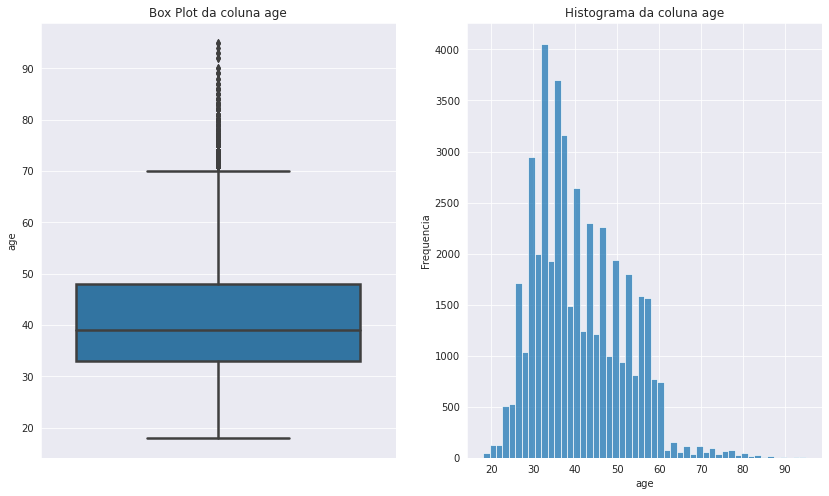

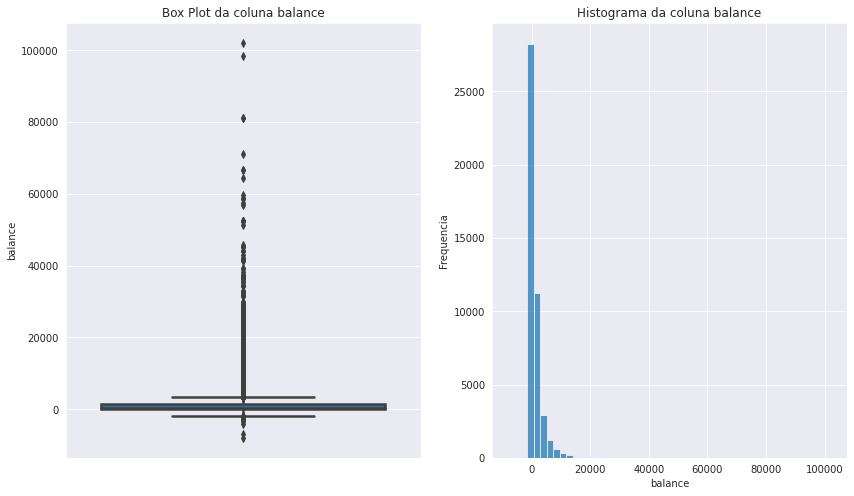

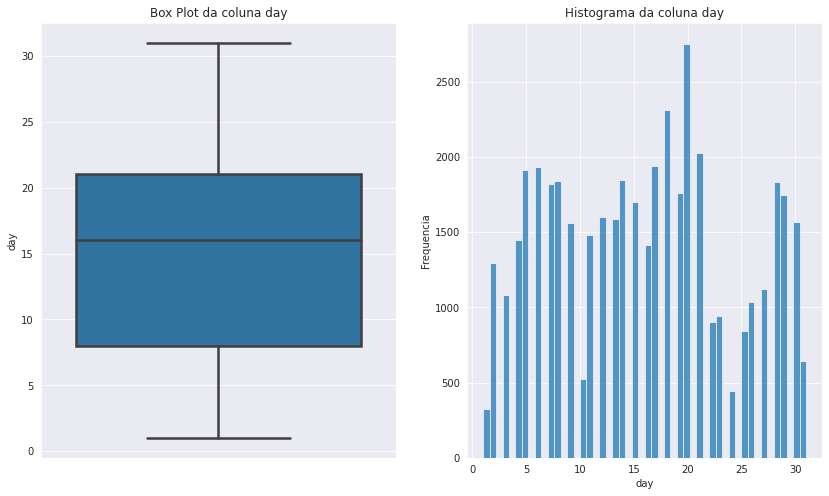

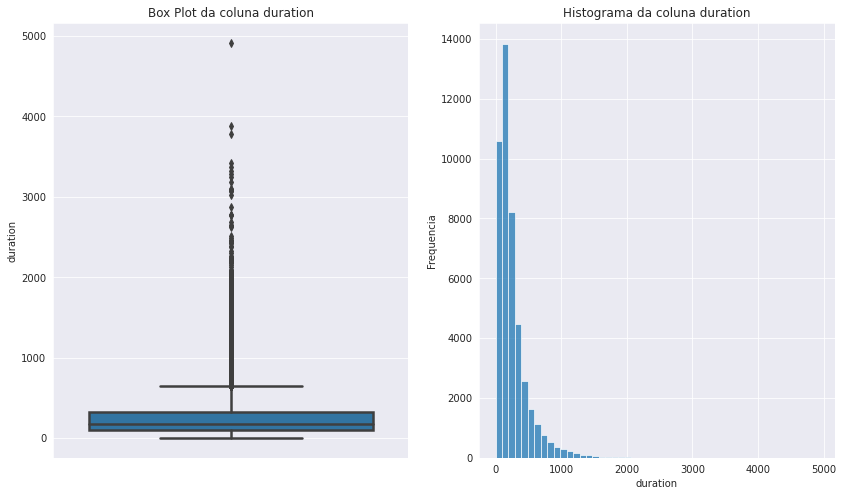

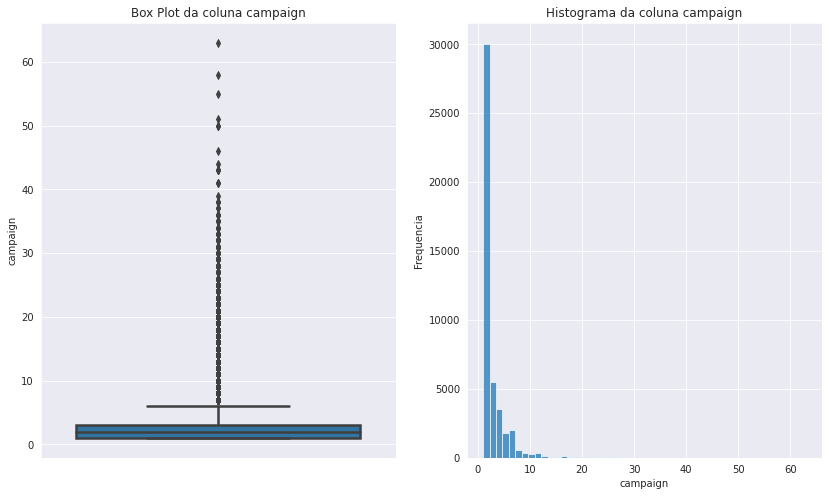

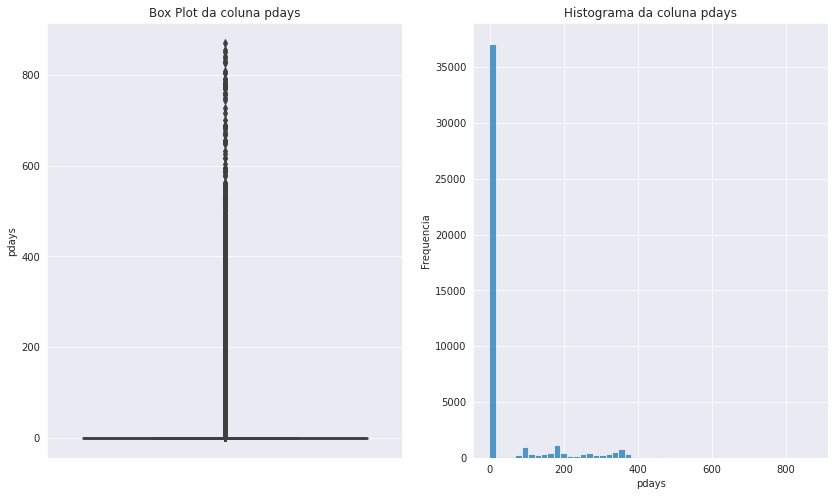

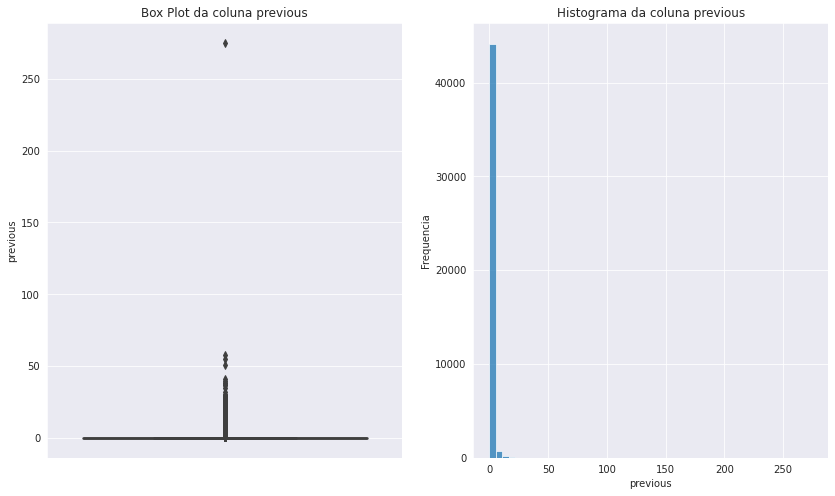

In [16]:
# Iterando sobre o nome das colunas numéricas
for coluna in colunas_numericas:
  # Obtendo os plots importantes para cada coluna
  obter_plots_numericos(df, coluna)

### Obtendo dados das colunas categóricas

Criando a função responsável pela obtenção das estatísticas relevantes para as colunas categóricas:

In [17]:
def obter_estatisticas_categoricas(dataframe, coluna):
  """
    Função responsável pela obtenção das principais estatísticas de uma coluna
    específica do dataframe

    Args:
        dataframe (pandas.DataFrame) : Dataframe contendo o conjunto de dados a ser avaliado
        coluna (str) : Nome da coluna do Dataframe a ser analisada
    
    Returns:
        estatisticas (pandas.Dataframe) : Dataframe contendo todas as estatisticas
                                           relevantes da coluna especificada

  """

  # Criação de uma lista de colunas para armazenar as estatísticas
  estat_cols = ['Qtd_Nao_NaN', "Qtd_Valore_Unicos", "Mais_Frequente",  
                "Qtd_Mais_Frequente"]

  # Obtém estatísticas básicas através da função describe e armazena em um dataframe
  estatisticas = pd.DataFrame(dataframe[coluna].describe()).T

  
  # Criação de dicionário para renomeação das colunas 'count', 'unique', 'top', 'freq'
  cols_renomeadas = {"count": "Qtd_Nao_NaN", "unique" : "Qtd_Valore_Unicos", 
                     "top" : "Mais_Frequente", "freq": "Qtd_Mais_Frequente"}

  # Renomeando as colunas 'count', 'unique', 'top', 'freq'
  estatisticas.rename(columns = cols_renomeadas, inplace = True)

  return estatisticas[estat_cols]

Obtendo um dataframe com as estatísticas relevantes para as colunas categóricas:

In [18]:
# Criando o dataframe
stats = pd.DataFrame()

# Iterando sobre o nome das colunas categoricas
for coluna in colunas_categoricas:
  # Concatenando os dataframes
  stats = pd.concat([stats,obter_estatisticas_categoricas(df,coluna)])

# Imprimindo as estatisticas
stats

,Qtd_Nao_NaN,Qtd_Valore_Unicos,Mais_Frequente,Qtd_Mais_Frequente
job,45211,12,blue-collar,9732
marital,45211,3,married,27214
education,45211,4,secondary,23202
default,45211,2,no,44396
housing,45211,2,yes,25130
loan,45211,2,no,37967
contact,45211,3,cellular,29285
month,45211,12,may,13766
poutcome,45211,4,unknown,36959
y,45211,2,no,39922


Criando uma função auxiliar para plotar os valores associados a cada barra do histograma:

In [19]:
def show_values(axs, orient="v", space=.01):
    def _single(ax):
        if orient == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height() + (p.get_height()*0.01)
                value = '{:.1f}'.format(p.get_height())
                ax.text(_x, _y, value, ha="center") 
        elif orient == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height() - (p.get_height()*0.5)
                value = '{:.1f}'.format(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _single(ax)
    else:
        _single(axs)

Criando a função responsável pela criação e plotagem dos gráficos relevantes para as colunas categóricas:

In [20]:
def obter_plots_categoricos(dataframe, coluna):
  """
    Função responsável pela criação dos plots relevantes para uma coluna 
     específica do dataframe.
    
    Args:
        dataframe (pandas.DataFrame) : Dataframe contendo o conjunto de dados a ser avaliado
        coluna (str) : Nome da coluna do Dataframe a ser analisada
    
    Returns:
        None 

  """
  
  # Criando a figura e o eixo para os plots
  fig , ax = plt.subplots(1, figsize=(18,8))
  
  # Criando o histograma
  plot = sns.histplot(dataframe[coluna], ax = ax)
  # Adicionando o titulo ao histograma
  ax.set_title(f"Histograma da coluna {coluna}")
  # Adicionando label do eixo y
  ax.set_ylabel("Frequencia")
  # Adicionando contagem dos valores em cada classe do histograma
  show_values(plot)

  # Plotando os graficos
  plt.show()


Plotando os gráficos relevantes para cada coluna categórica:

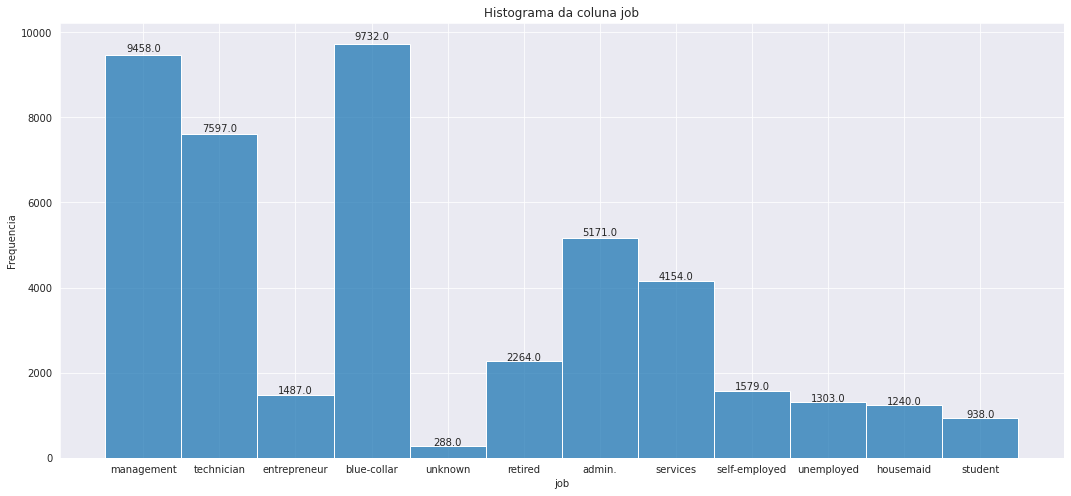

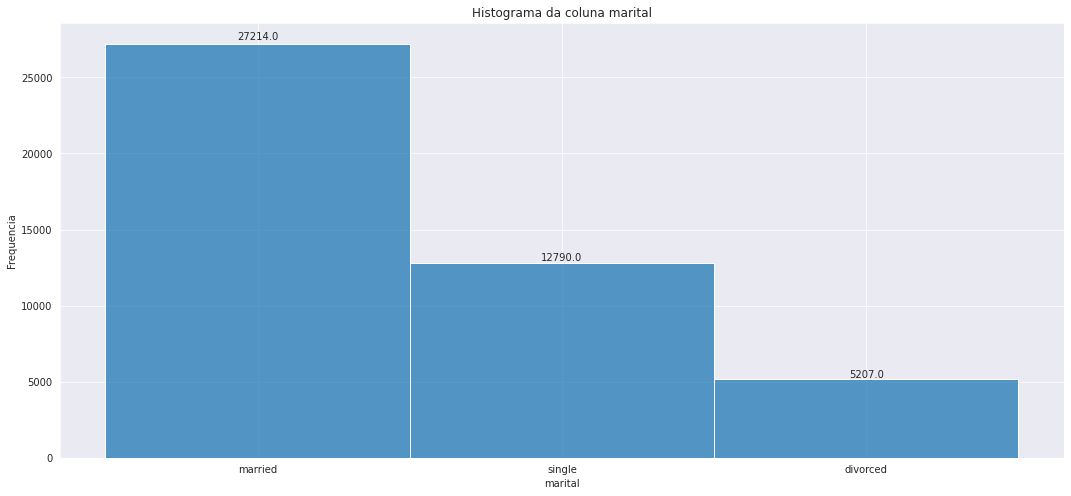

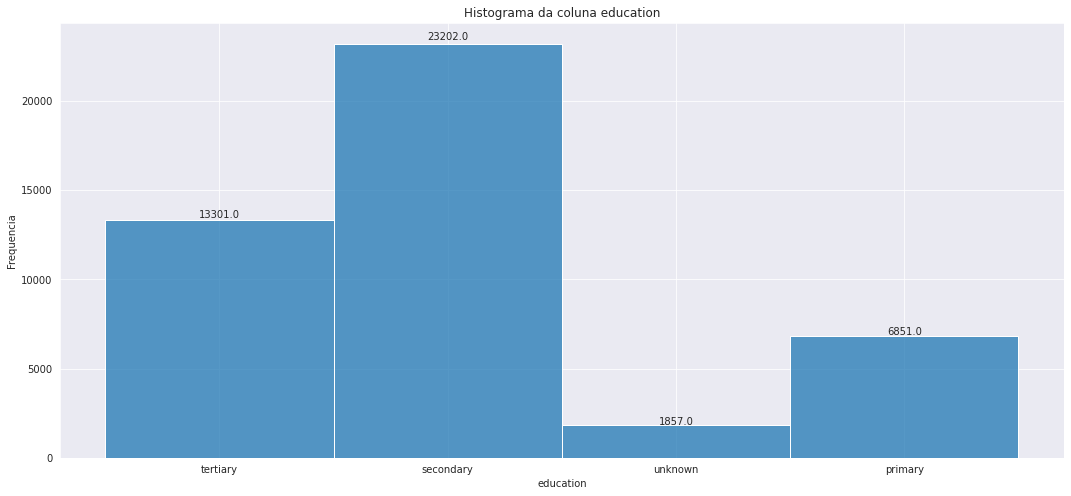

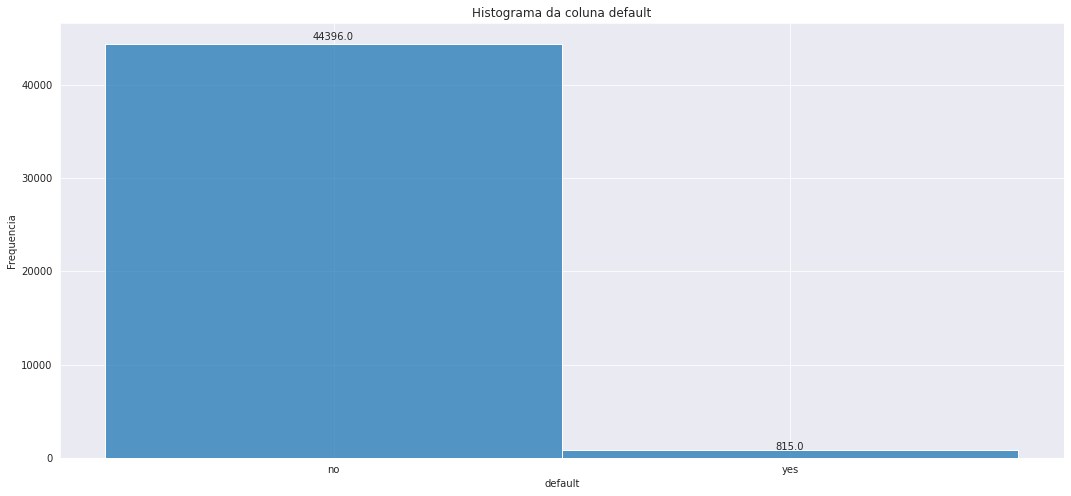

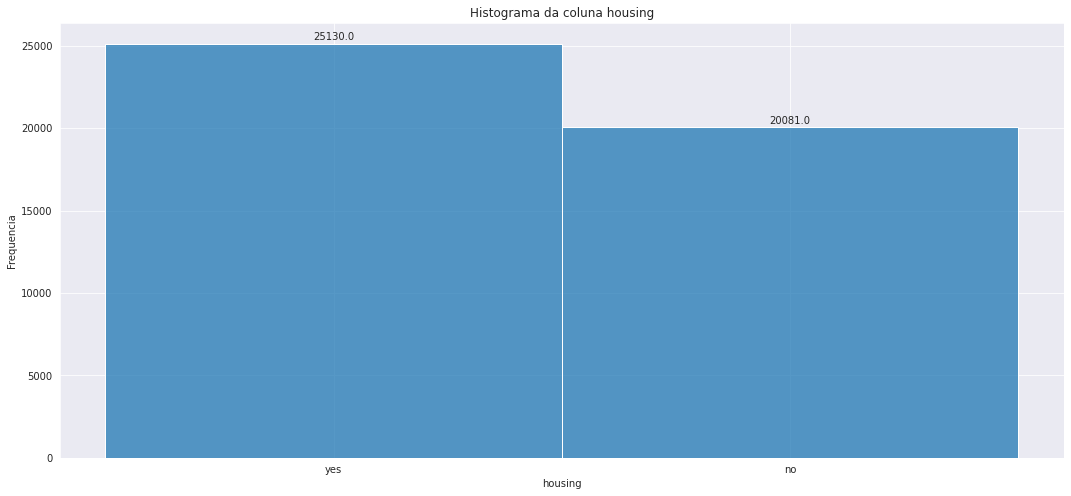

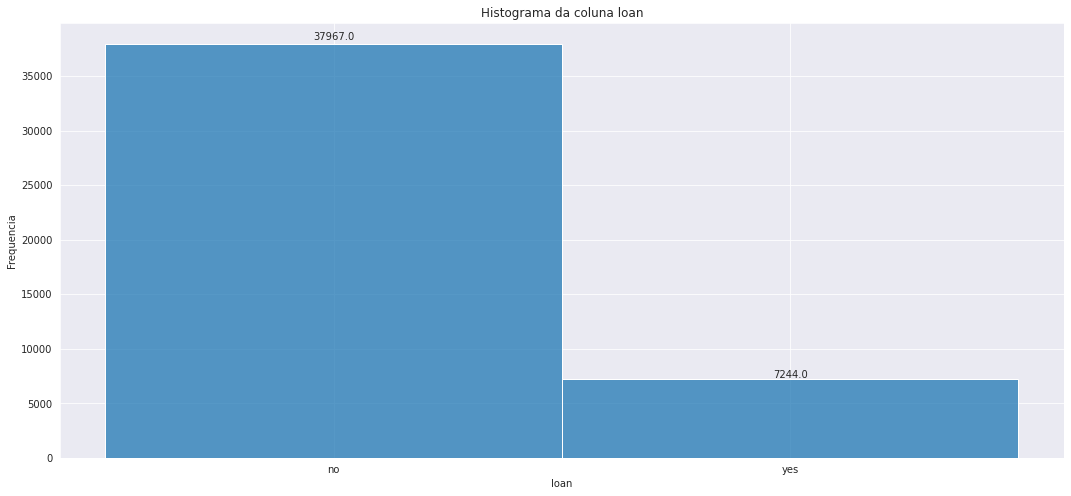

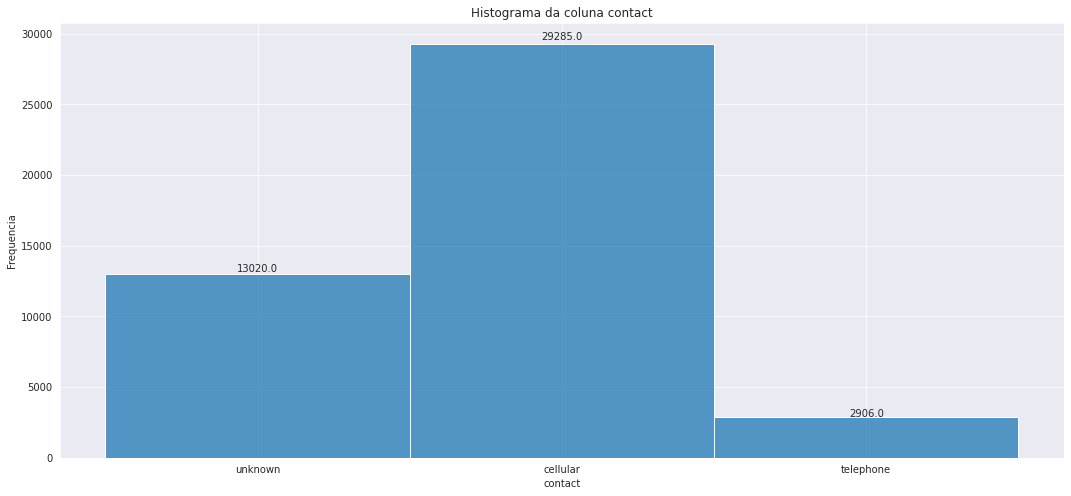

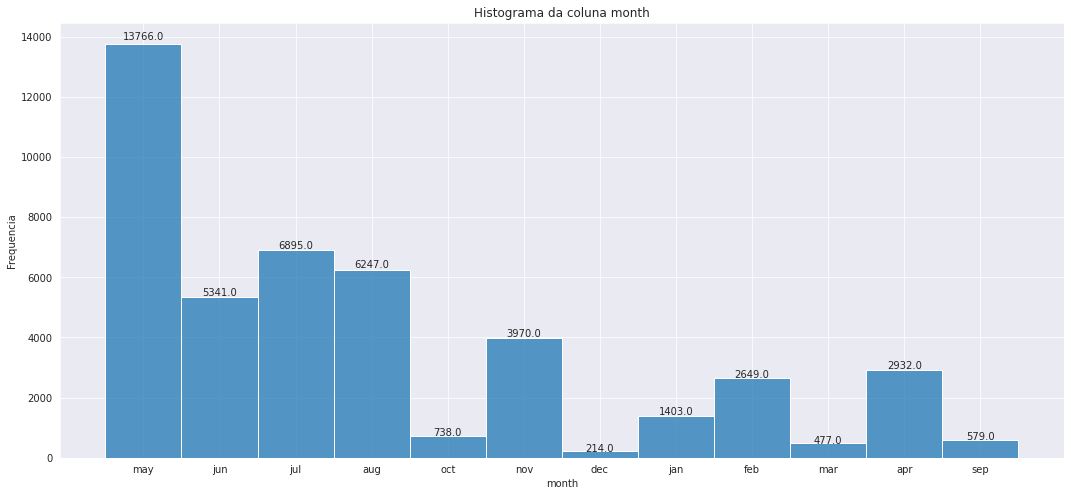

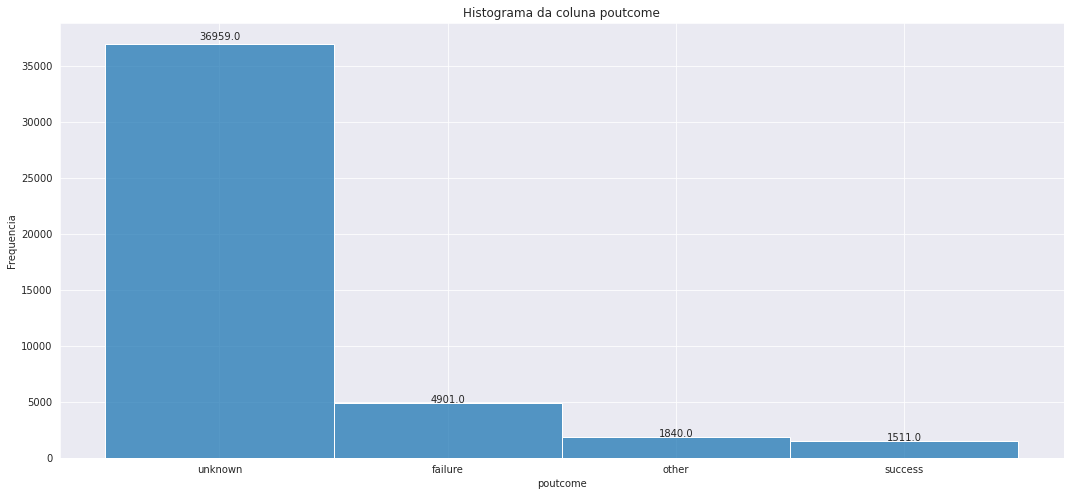

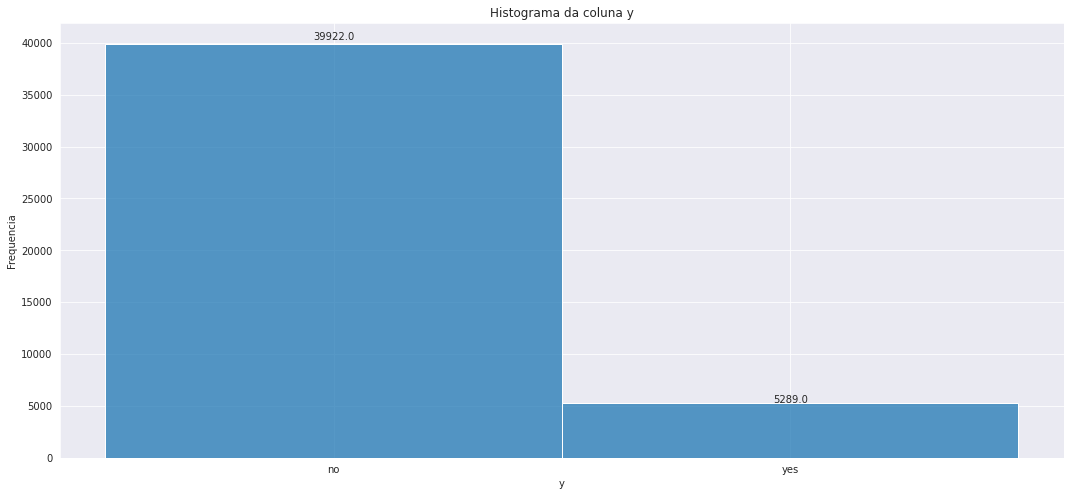

In [21]:
# Iterando sobre o nome das colunas categóricas
for coluna in colunas_categoricas:
  # Obtendo os plots importantes para cada coluna
  obter_plots_categoricos(df, coluna)

### Analisando as relações entre algumas colunas e os labels antes do treinamento



Nessa primeira análise vamos ver graficamente os dados que relacionam o número de acordos concretizados com o cargo do consumidor em meses específicos.

In [22]:
#Função para separar o dataset original em um dataset menor a depender do mês em que se deseja visualizar os dados quantitativamente
def separar_mes(df,mes):
  mes=df[(df['month']==mes)].copy()
  mes_yn=list(mes.groupby(["job", "y"]).size().reset_index(name="Time")['Time'])
  mes_jobs=list(mes.groupby(["job", "y"]).size().reset_index(name="Time")['job'])
  mes_y=list(mes.groupby(["job", "y"]).size().reset_index(name="Time")['y'])
  for i in range(len(mes_jobs)):
      rowIndex = mes.index[(mes['y']==mes_y[i]) & (mes['job']==mes_jobs[i])]
      mes.loc[rowIndex, 'yn_numbers'] = mes_yn[i]
  return mes

Separação em dataframes menores por mês

In [23]:
jan=separar_mes(df,"jan")
feb=separar_mes(df,"feb")
apr=separar_mes(df,"apr")
mar=separar_mes(df,"mar")
may=separar_mes(df,"may")
jun=separar_mes(df,"jun")
jul=separar_mes(df,"jul")
aug=separar_mes(df,"aug")
sep=separar_mes(df,"sep")
oct=separar_mes(df,"oct")
nov=separar_mes(df,"nov")
dec=separar_mes(df,"dec")

Contatenação dos dataframes menores

In [24]:
total_df=pd.concat([jan,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec], ignore_index=True)

A partir do gráfico abaixo é possível visualizar os dados para os mês de Janeiro. Para esse mês podemos concluir que o cargo mais contactado foi o de gerência para esse mês, e que a maioria das respostas dos contactados foram "não". Todavia percebe-se que dentre as respostas positivas, os que mais aderiram ao plano foram os aposentados e os que menos aceitaram foram os de empreendedores.

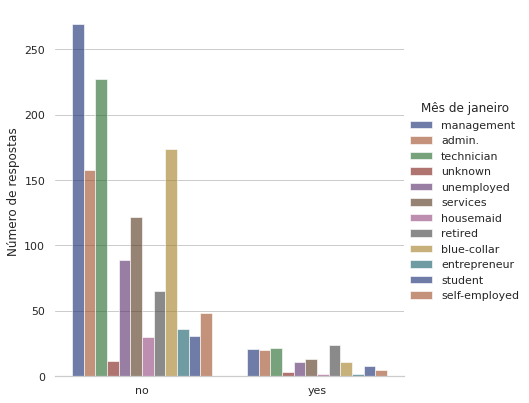

In [25]:
#visualização do gráfico individual em um mês específico
import seaborn as sns
sns.set_theme(style="whitegrid")

#O usuário pode alterar o argumento data para visualizar o mês que preferir


g = sns.catplot(
    data=jan, kind="bar",
    x="y", y='yn_numbers', hue="job",
    ci="sd", palette="dark", alpha=.6, height=6
)
g.despine(left=True)
g.set_axis_labels("", "Número de respostas")
g.legend.set_title("Mês de janeiro")

Agora fazendo uma análise do comparativo entre todos os meses se percebe que existe um grande volume de dados no mês de Maio. Nesse mês, diferentemente do mês de Janeiro se percebeu que o maior numéro de contactados foram os trabalhadores braçais, estando eles presentes tanto no maior número de "Não" e "Sim".

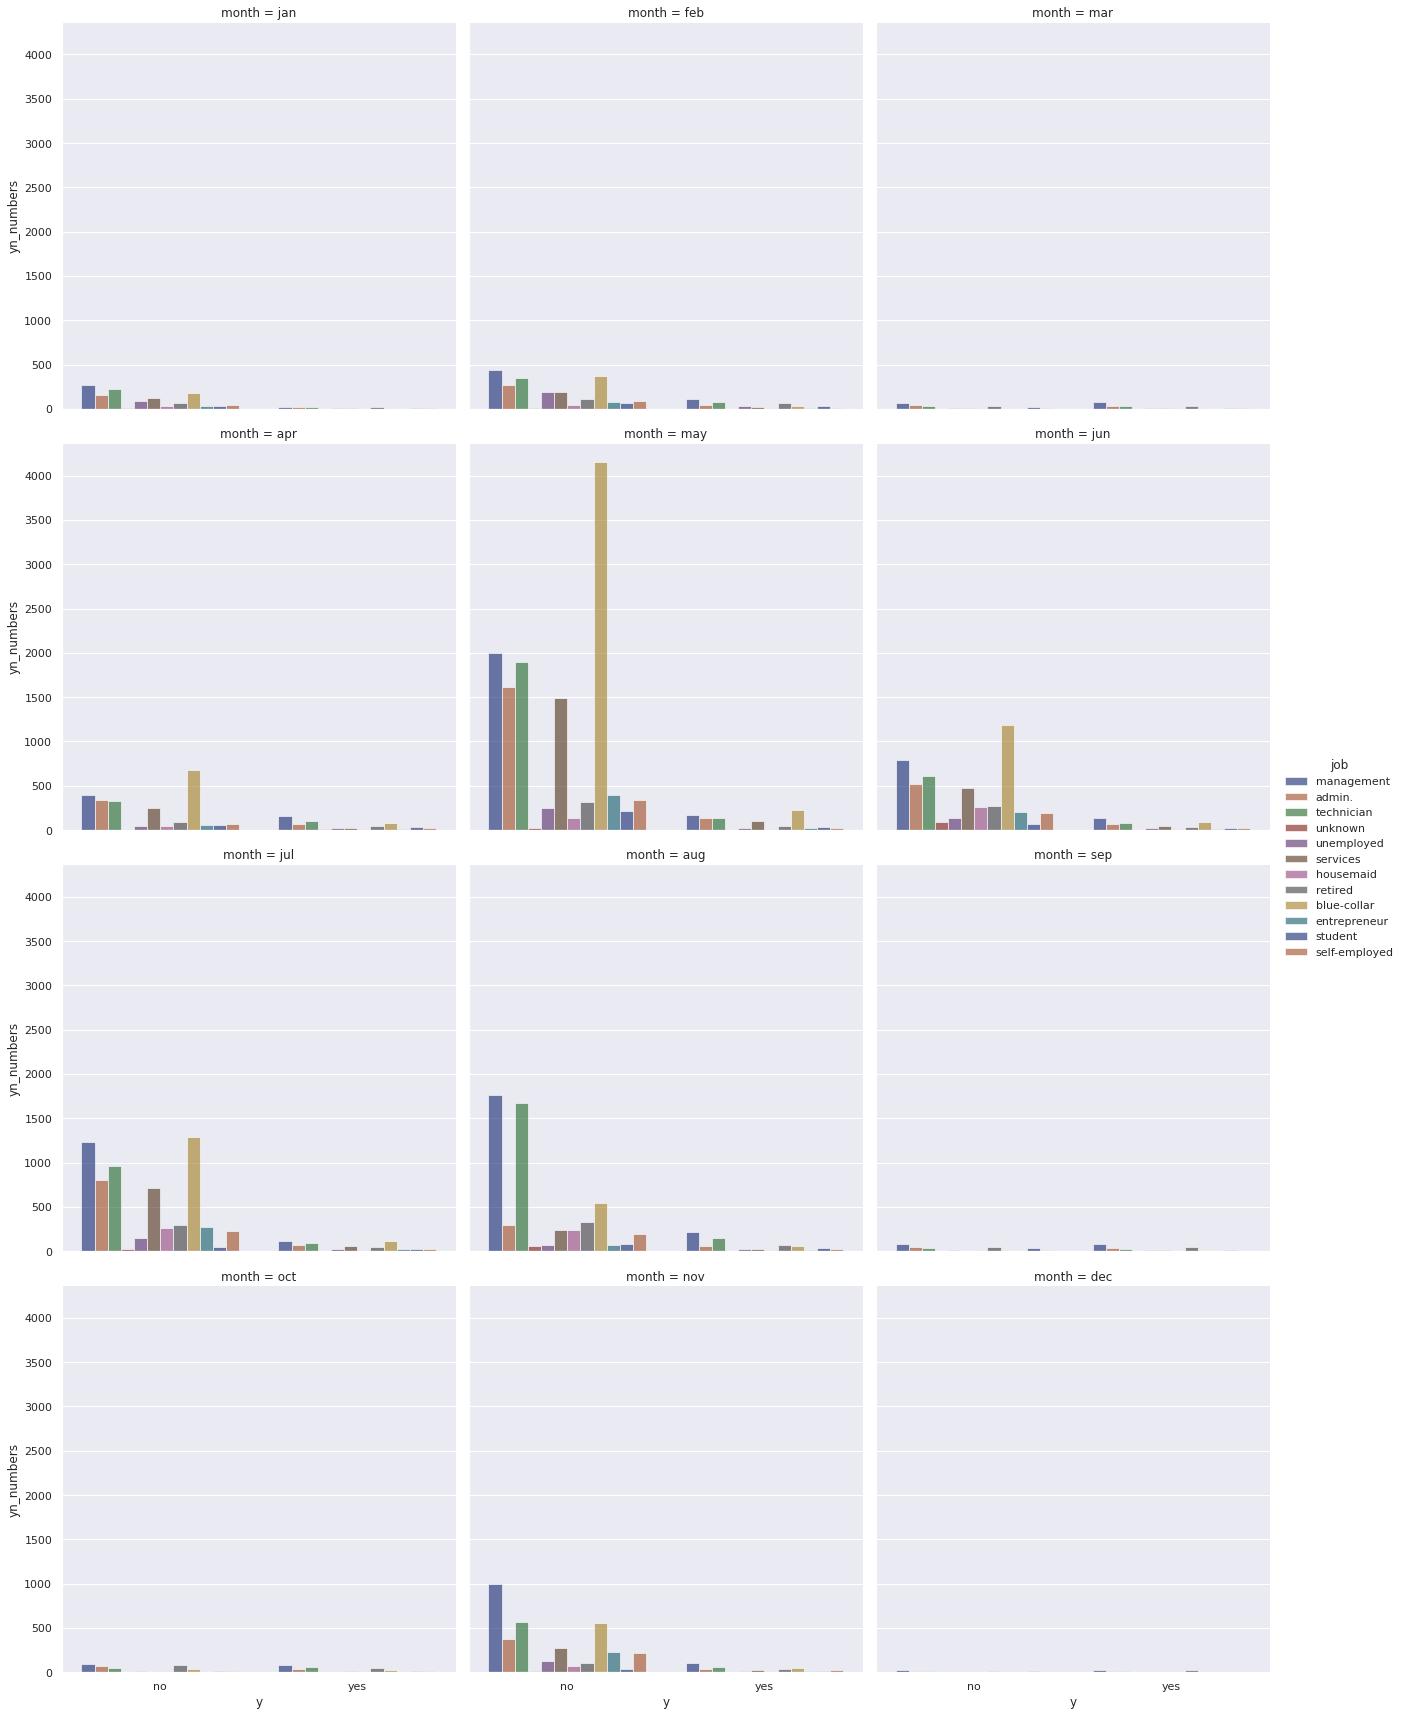

In [26]:
#Visualização comparativa de vários gráficos cada um representando um mês do ano
import seaborn as sns
import matplotlib.pyplot as plt


sns.set(style="ticks")
sns.set_style("darkgrid")
g = sns.catplot(
    data=total_df, kind="bar",
    x="y", y='yn_numbers', hue="job",col="month",col_wrap=3,
    ci="sd", palette="dark", alpha=.6, height=6
)
plt.show()


Dessa forma, se torna necessário fazer uma análise percentual e não mais puramente quantitativa, para se ter uma noção do grupo que mais contribui percentualmente para a adesão de mais acordos.

In [27]:
#Função para separar o dataset original em um dataset menor a depender do mês em que se deseja visualizar os dados percentuais
def separar_mes_per(df,mes):
  if mes=="dec":
    mes=df[(df['month']==mes)].copy()
    mes=mes.groupby(["job", "y"]).size().reset_index(name="Time")
    data = {'job':['unknown'],
        'y':["yes"],
        'Time':[0]}
    add = pd.DataFrame(data)
    mes=pd.concat([mes,add], ignore_index=True)
    mes_yn=list(mes['Time'])
    mes_jobs=list(mes['job'])
    mes_y=list(mes['y'])

    
  else:
    mes=df[(df['month']==mes)].copy()
    mes_yn=list(mes.groupby(["job", "y"]).size().reset_index(name="Time")['Time'])
    mes_jobs=list(mes.groupby(["job", "y"]).size().reset_index(name="Time")['job'])
    mes_y=list(mes.groupby(["job", "y"]).size().reset_index(name="Time")['y'])
  for i in range(len(mes_jobs)):
      rowIndex = mes.index[(mes['y']==mes_y[i]) & (mes['job']==mes_jobs[i])]
      if mes_y[i]== "no":
        mes.loc[rowIndex, 'yn_numbers'] = mes_yn[i]/(mes_yn[i]+mes_yn[i+1])
      else:
        mes.loc[rowIndex, 'yn_numbers'] = mes_yn[i]/(mes_yn[i]+mes_yn[i-1])
  return mes

Separação dos dataframes com colunas percentuais em cada mês e por fim concatenação em total_df_per

In [28]:
jan_per=separar_mes_per(df,"jan")
feb_per=separar_mes_per(df,"feb")
apr_per=separar_mes_per(df,"apr")
mar_per=separar_mes_per(df,"mar")
may_per=separar_mes_per(df,"may")
jun_per=separar_mes_per(df,"jun")
jul_per=separar_mes_per(df,"jul")
aug_per=separar_mes_per(df,"aug")
sep_per=separar_mes_per(df,"sep")
oct_per=separar_mes_per(df,"oct")
nov_per=separar_mes_per(df,"nov")
dec_per=separar_mes_per(df,"dec")
total_df_per=pd.concat([jan_per,feb_per,mar_per,apr_per,may_per,jun_per,jul_per,aug_per,sep_per,oct_per,nov_per,dec_per], ignore_index=True)

Inicialmente vamos fazer uma análise percentual para o mês de Janeiro, como foi feito anteriormente para os dados brutos, aqui se percebe que realmente o grupo dos aposentados foram o grupo mais efetivo na adesão da campanha.

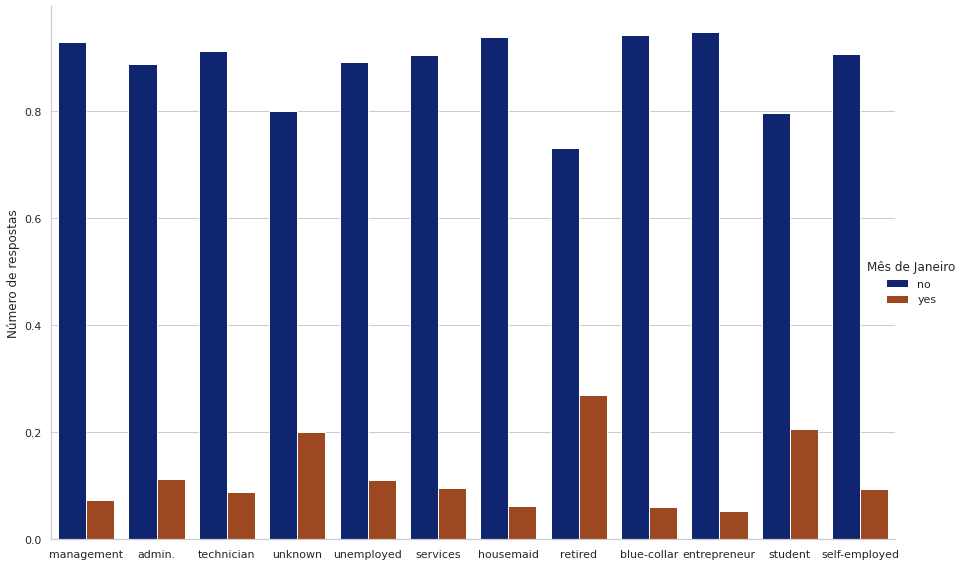

In [29]:
#visualização do gráfico individual em um mês específico
sns.set_theme(style="whitegrid")

#O usuário pode alterar o argumento data para visualizar o mês que preferir

g = sns.catplot(
    data=jan_per, kind="bar",
    x="job", y='yn_numbers', hue="y",
    ci="sd", palette="dark", aspect=12.7/8.27, height=8.27
)

g.set_axis_labels("", "Número de respostas")
g.legend.set_title("Mês de Janeiro")

Agora será feita uma análise interessante, apesar do grupo dos trabalhadores braçais terem sido os que mais aderiram ao contrato no mês de Maio(mês em que a campanha esteve mais ativa e mais pessoas foram contactadas), percentualmente esse foi o grupo de segundo pior desempenho, indicando que se talvez fossem contactados mais estudantes ou aposentados de que trabalhadores braçais, a empresa teria fechado mais contratos.

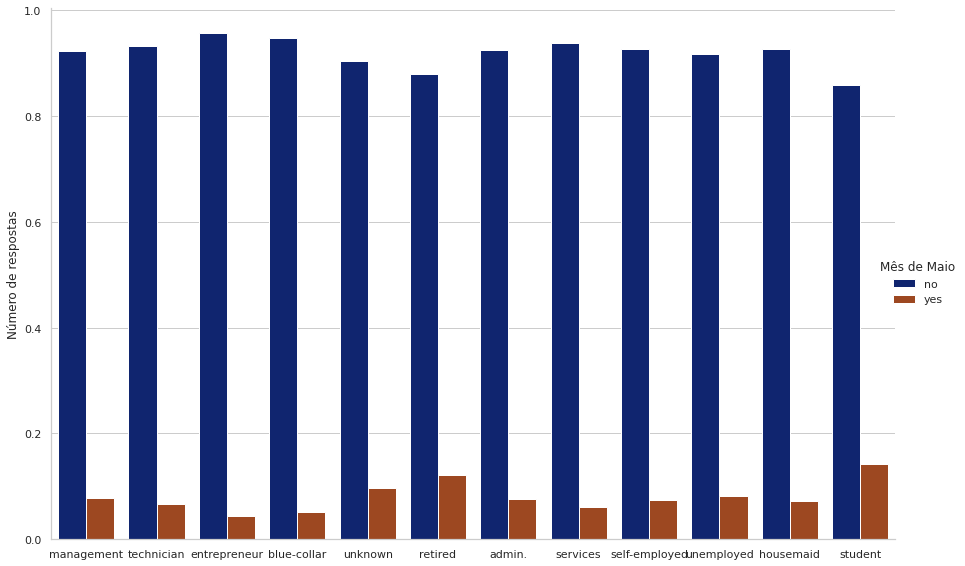

In [30]:
#visualização do gráfico individual em um mês específico
sns.set_theme(style="whitegrid")


#O usuário pode alterar o argumento data para visualizar o mês que preferir
g = sns.catplot(
    data=may_per, kind="bar",
    x="job", y='yn_numbers', hue="y",
    ci="sd", palette="dark", aspect=12.7/8.27, height=8.27
)

g.set_axis_labels("", "Número de respostas")
g.legend.set_title("Mês de Maio")

Analisando todos os gráficos percentuais de uma vez, se percebe que alguns dados interessantes, que o grupo de serviços teve um maior número de meses com percentual de "sim" acima de "não", em 3 meses diferentes. Pode-se notar também que o mês em que mais grupos aceitaram a proposta da campanha foi o mês de março, com 8 grupos.

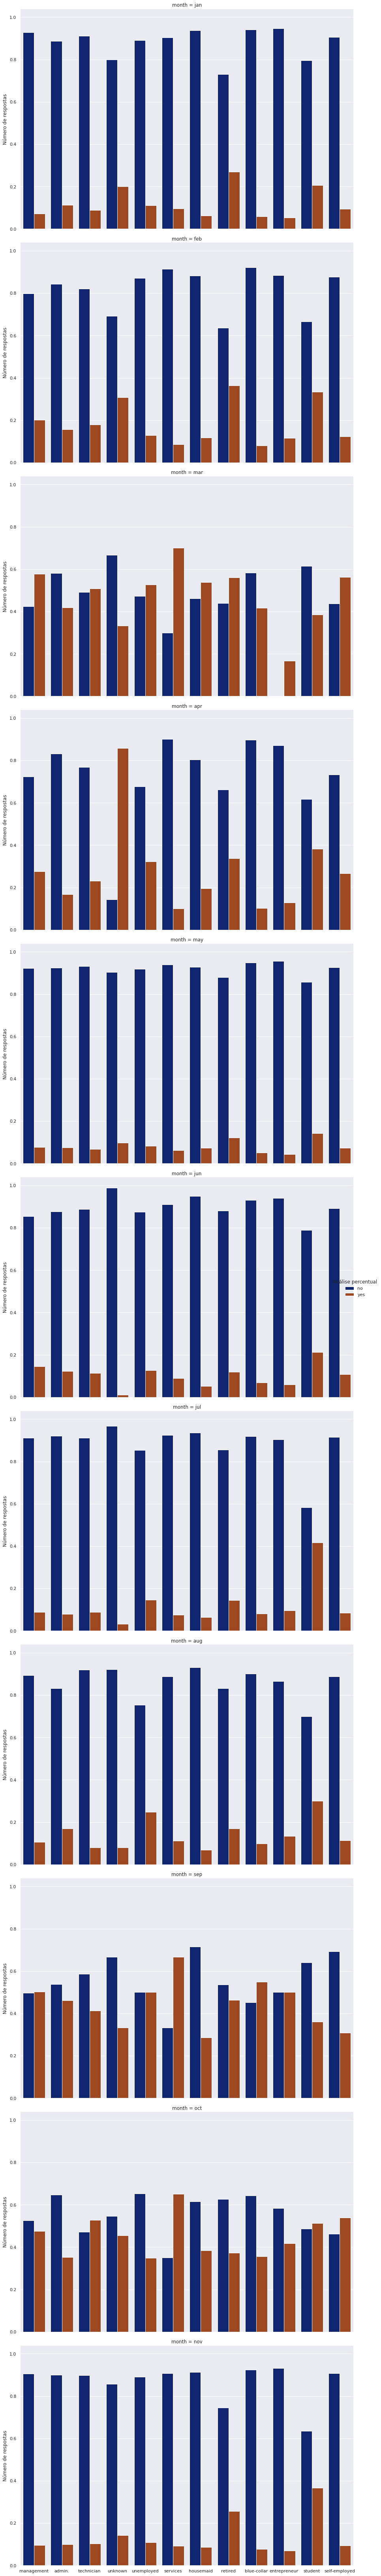

In [31]:
#Visualização comparativa de vários gráficos cada um representando um mês do ano
import seaborn as sns
import matplotlib.pyplot as plt


sns.set(style="ticks")
sns.set_style("darkgrid")
g = sns.catplot(
    data=total_df_per, kind="bar",
    x="job", y='yn_numbers', hue="y",row="month",
    ci="sd", palette="dark", aspect=12.7/8.27, height=8.27
)
g.set_axis_labels("", "Número de respostas")
g.legend.set_title("Análise percentual")

Visto os dados acima, vamos analisar agora qual foi o melhor mês e qual o melhor grupo em termos de efetividade e percentualmente falando.

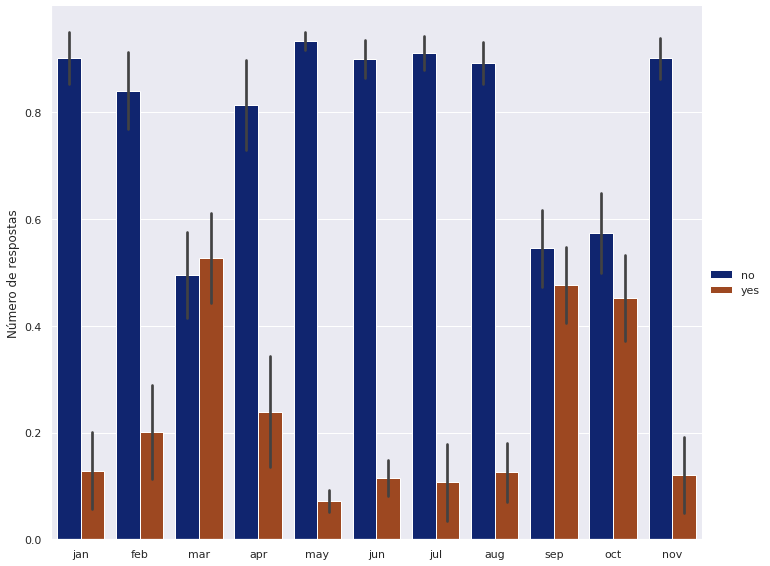

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.set(style="ticks")
sns.set_style("darkgrid")
g = sns.catplot(
    data=total_df_per, kind="bar",
    x="month", y='yn_numbers', hue="y",
    ci="sd", palette="dark", aspect=10/8.27, height=8.27
)
g.set_axis_labels("", "Número de respostas")
g.legend.set_title("")

A partir da análise acima se percebe que o grupo dos aposentados, dos estudantes e de cargo desconhecido foram o que proporcionalmente mais contribuiram para a adesão ao banco. Apesar do grupo desconhecido não trazer muitos dados concretos para campanhas futuras, temos um indicador de que o grupo dos aposentados e estudantes foram os que mais se disponibilizaram a adesão, podendo essa análise influenciar em análises futuros. Outro fato curioso, é que o traço em preto representa a variação dos grupos nos meses do ano, e pode-se perceber que em praticamente todos os grupos a variação é bastante alta, indicando que existem meses melhores e piores para se realizar o contato.

In [33]:
#Será retirado do dataset total_df_per apenas as colunas com os meses e as labels('y') e será utilizada a função groupby para fazer a divisão
update_df=total_df_per.groupby(['month', 'y']).size().unstack(fill_value=0)
update_df=pd.DataFrame(update_df.rename(columns = {"no": 'nao',"yes":"sim","job":"Cargo","y":""}, inplace = False))
#A separação será armazenada no dataset update_df, que será separado em update_df_1 que contém apenas os resultados "no" por mês e update_df_2
#que representa a parte final do dataset, apenas com os valores "yes" em cada mês
update_df=update_df.groupby(['month']).sum().unstack(fill_value=0).reset_index()
update_df=pd.DataFrame(update_df)
update_df=update_df.drop('y', 1)
update_df_1=update_df.iloc[0:11]
update_df_2=update_df.iloc[11:]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


Abaixo será feito algumas alterações pontuais de algumas colunas e index

In [34]:
update_df_1=pd.DataFrame(update_df_1.rename(columns = {0: 'nao'}, inplace = False))
update_df_2=pd.DataFrame(update_df_2.rename(columns = {0: 'sim'}, inplace = False))
update_df_2=update_df_2.drop('month', 1)
update_df_2=update_df_2.reset_index()
update_df_2=update_df_2.drop('index', 1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """


Por fim será feita a concatenação dos dois dataframes e os cálculos percentuais

In [35]:
df_percentage = pd.concat([update_df_1, update_df_2], axis=1, join='inner')
df_percentage["porcentagem de sim"]=df_percentage["sim"]/(df_percentage["sim"]+df_percentage["nao"])
df_percentage["porcentagem de nao"]=df_percentage["nao"]/(df_percentage["sim"]+df_percentage["nao"])
df_percentage["Total"]=df_percentage["sim"]+df_percentage["nao"]
df_percentage

,month,nao,sim,porcentagem de sim,porcentagem de nao,Total
0,apr,2355,577,0.196794,0.803206,2932
1,aug,5559,688,0.110133,0.889867,6247
2,feb,2208,441,0.166478,0.833522,2649
3,jan,1261,142,0.101212,0.898788,1403
4,jul,6268,627,0.090935,0.909065,6895
5,jun,4795,546,0.102228,0.897772,5341
6,mar,229,248,0.519916,0.480084,477
7,may,12841,925,0.067195,0.932805,13766
8,nov,3567,403,0.101511,0.898489,3970
9,oct,415,323,0.437669,0.562331,738


Na tabela podemos ver percentualmente a validação das discussões estabelecidas a partir da análise do gráfico, aqui podemos ver que realmente o mês de Março foi o melhor mês com quase 52% de negócios estabelecidos e o mês de Maio o pior com apenas 6%. Quantitativamente o mês de Maio foi o melhor, porém esse também é o mês com a maioria de "nãos" com 12841. Agora faremos a mesma análise só que separando por cargo.

In [36]:
#filtragem de dataset total_df_per para mostrar a coluna dos cargos e labels apenas, e armazenando em update_job
update_job=total_df_per.groupby(['job', 'y']).size().unstack(fill_value=0)
update_job=pd.DataFrame(update_job.rename(columns = {"no": 'nao',"yes":"sim","job":"Cargo","y":""}, inplace = False))
update_job=update_job.groupby(['job']).sum().unstack(fill_value=0).reset_index()
update_job=pd.DataFrame(update_job)

Divisão do dataset em dois como no caso anterior

In [37]:
update_job=update_job.drop('y', 1)
update_job_1=update_job.iloc[0:12]
update_job_2=update_job.iloc[12:]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


Retirada de colunas e index pontuais

In [38]:
update_job_1=pd.DataFrame(update_job_1.rename(columns = {0: 'nao'}, inplace = False))

In [39]:
update_job_2=pd.DataFrame(update_job_2.rename(columns = {0: 'sim'}, inplace = False))
update_job_2=update_job_2.drop('job', 1)
update_job_2=update_job_2.reset_index()
update_job_2=update_job_2.drop('index', 1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  after removing the cwd from sys.path.


Por fim será feita a concatenação dos dois dataframes e os cálculos percentuais

In [40]:
job_percentage = pd.concat([update_job_1, update_job_2], axis=1, join='inner')
job_percentage["porcentagem de sim"]=job_percentage["sim"]/(job_percentage["sim"]+job_percentage["nao"])
job_percentage["porcentagem de nao"]=job_percentage["nao"]/(job_percentage["sim"]+job_percentage["nao"])
job_percentage["Total"]=job_percentage["sim"]+job_percentage["nao"]
job_percentage

,job,nao,sim,porcentagem de sim,porcentagem de nao,Total
0,admin.,4530,620,0.120388,0.879612,5150
1,blue-collar,9018,704,0.072413,0.927587,9722
2,entrepreneur,1363,123,0.082773,0.917227,1486
3,housemaid,1128,108,0.087379,0.912621,1236
4,management,8132,1277,0.135721,0.864279,9409
5,retired,1729,496,0.222921,0.777079,2225
6,self-employed,1389,186,0.118095,0.881905,1575
7,services,3779,362,0.087418,0.912582,4141
8,student,660,263,0.284940,0.715060,923
9,technician,6738,830,0.109672,0.890328,7568


Agora fazendo uma análise percentual se pôde concluir também que percentualmente é mais vantajoso entrar em contato com estudantes e aposentados para adesão

## Processamento do Conjunto de Dados


### Separação em conjunto de treino e teste

Uma vez analisado de forma inicial alguns dados na forma de dataframes e gráficos, se torna interessante treinar um modelo para predizer quais os possíveis novos usuários do banco em posteriores campanhas e como as colunas do dataset podem influenciar no resultado final. Visto isso, para o treinamento de um modelo de Machine Learning, os dados brutos do dataset original precisam ser pré processados para possibilitar um bom treinamento, os detalhes desse processamento são apresentados a posteriormente.

In [41]:
from sklearn.model_selection import train_test_split
"""
Inicialmente foram divididos 70% da linhas para treinamento do modelo e
30% para testes, de forma a garantir um bom volume de dados de treinamento 
com uma variadade considerável dos dados, bem como no teste para evitar possíveis 
overfittings e underfittings
"""
x_train, x_test, y_train, y_test = train_test_split(df.drop(labels="y",axis=1),
                                                    df["y"],
                                                    test_size=0.30,
                                                    random_state=1,
                                                    shuffle=True,
                                                    stratify=df["y"])

### Aplicação de técnicas de pré-processamento

Abaixo será feita a retirada dos outliers, que são dados que se diferenciam drasticamente de todos os outros. Em outras palavras, um outlier é um valor que foge da normalidade e que pode (e provavelmente irá) causar anomalias nos resultados obtidos por meio de algoritmos e sistemas de análise.

In [42]:
from sklearn.neighbors import LocalOutlierFactor
#Seleção da variáveis numéricas
x = x_train.select_dtypes("int64").copy()

# identificação dos outliers
lof = LocalOutlierFactor()
outlier = lof.fit_predict(x)
mask = outlier != -1

print("X_train shape [original]: {}".format(x_train.shape))
print("X_train shape [outlier removal]: {}".format(x_train.loc[mask,:].shape))

#Comparativo entre o numéro de linhas original e após a remoção dos outliers
x_train = x_train.loc[mask,:].copy()
y_train = y_train[mask].copy()

X_train shape [original]: (31647, 16)
X_train shape [outlier removal]: (30973, 16)


Abaixo será utilizada a classe **LabelEncoder**, que permite a utilização dos métodos **fit_transform** para as variáveis de treinamento e a **transform** para as variáveis de teste. Basicamente um método **fit** calcula a média e o desvio-padrão para serem usados ​​em redimensionamentos posteriores e o método **transform** usa a média e o desvio-padrão previamente calculadas para dimensionar automaticamente os dados. Para o conjunto de treinamento X , utilizamos o método **fit_transform** que faz os dois métodos anteriores ao mesmo tempo porque, visto que é necessário calcular a média e o desvio-padrão e, em seguida, usá-lo para dimensionar automaticamente os dados. Para o conjunto de testes X , como já se tem a média e o desvio-padrão, utiliza-se apenas o método **transform**.

In [43]:
from sklearn.preprocessing import LabelEncoder
#Criação do objeto LabelEncoder
le = LabelEncoder()

# Utilização do método fit_trasform
y_train = le.fit_transform(y_train)

# Utilização do método fit_trasform
y_test = le.transform(y_test)

print("Classes: {}".format(le.classes_))

Classes: ['no' 'yes']


Confirmação das labels

In [44]:
le.inverse_transform([0, 1])

array(['no', 'yes'], dtype=object)

Agora será definida uma classe que recebe como argumento o tipo de coluna do dataframe original a ser utilizado em um posterior **pipeline**, essa classe facilita a obtenção e definição das colunas específicas ao pré processamento.

In [45]:
from sklearn.base import BaseEstimator, TransformerMixin
"""
 As colunas enviados como argumento são enviadas ao construtor para posterior tratamento
 aqui são herdadas classes da biblioteca sklearn.base caso algun método venha a ser necessário
""" 
class Seletor_colunas( BaseEstimator, TransformerMixin ):
    #Construtor
    def __init__( self, nome_colunas ):
        self.nome_colunas = nome_colunas 
    
    #Método fit que não retornará nada, pois não será utilizado
    def fit( self, X, y = None ):
        return self 
    
    #Método transform caso seja necessário alguma alteração nas colunas, como as alterações não serão realizadas nessa fase, apenas retornará 
    #as colunas como foi passado no argumento
    def transform( self, X, y = None ):
        return X[ self.nome_colunas ]

Essa será a classe com função de pré processar todas as colunas que possuem dados categóricos. Cabe mencionar que no método **transform**, duas colunas foram retiradas, pois os dados tinham em sua quase totalidade o valor **unknown**, bem como as labels pareciam estar bem diversificadas sem padrão evidente comparando com os poucos valores diferentes de **unknown** para essas colunas, sendo pouco relevante para o modelo.

In [46]:
#  Classe para lidar com as variáveis categóricas
class Transforma_categorica( BaseEstimator, TransformerMixin ):
  # Construtor
  def __init__(self, new_features=True):
    self.new_features= new_features 
    self.colnames = None

  
  def fit( self, X, y = None ):
    return self 

  def get_feature_names(self):
        return self.colnames.tolist()

  # Modificação das colunas do dataset
  def transform(self, X , y = None ):
    df = X.copy()

    # condição para caso seja definido no argumento a mudança de colunas
    if self.new_features: 
      
      retirar = ["contact","poutcome"]
      df = df.drop(retirar,axis=1)

    # Atualização das colunas
    self.colnames = df.columns      
  
    return df

Análise das colunas antes do processamento

In [47]:
model = Seletor_colunas(x_train.select_dtypes("object").columns.to_list())
df = model.fit_transform(x_train)
df.head()

,job,marital,education,default,housing,loan,contact,month,poutcome
33413,admin.,married,secondary,no,no,no,cellular,apr,unknown
23506,management,married,tertiary,no,no,no,cellular,aug,unknown
18848,technician,married,secondary,no,no,no,cellular,aug,unknown
22217,services,married,secondary,no,no,no,cellular,aug,unknown
3164,technician,married,secondary,no,no,no,unknown,may,unknown


Análise colunas após processamento

In [48]:
model = Transforma_categorica(new_features=True)
df_cat = model.fit_transform(df)
df_cat.head()

,job,marital,education,default,housing,loan,month
33413,admin.,married,secondary,no,no,no,apr
23506,management,married,tertiary,no,no,no,aug
18848,technician,married,secondary,no,no,no,aug
22217,services,married,secondary,no,no,no,aug
3164,technician,married,secondary,no,no,no,may


Abaixo será definida uma classe para o pré processamento dos dados numéricos no dataset original. Os dados numéricos precisam ser pasronizados de alguma forma, isso se deve pelo fato das colunas numéricas assumirem diferentes faixas de valores e diferentes intervalos de variações, assim, uma padronização dos valores numéricos entre um intervalo de 0-1 por exemplo, mantidos suas devidas proporções, garantem uma equidade na importância de cada coluna para o modelo.

In [49]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
'''
Um fato interessante dessa classe está no fato dela permitir alterar o tipo de 
padronização apenas se alterando o argumento que vai para a definição da classe.
Caso model=0 o modelo será o MinMaxScaler() nesse modelo os valores das colunas serão 
dispostos de forma proporcional a um máximo e um mínimo valor definido pelo usuário.
Caso model=1 será utilizada a StandardScaler(), com essa função, os valores da escala
serão divididos de forma que a média será 0 e o desvio padrão 1, de forma em que cada 
valor será normalizado subtraindo a média e dividindo pelo desvio padrão.
Se o model for qualquer outro valor, não será realizado nenhum tipo de padronização.
'''
class Transformacao_numerica( BaseEstimator, TransformerMixin ):
  #Construtor
  def __init__(self, model = 0,new_features=True):
    self.new_features = new_features
    self.model = model
    self.colnames = None

  
  def fit( self, X, y = None ):
    return self

   
  def get_feature_names(self):
        return self.colnames 
        
  # Método para alteração das colunas
  def transform(self, X , y = None ):
    df = X.copy()
    if self.new_features: 
      
      retirar = ["pdays"]
      df = df.drop(retirar,axis=1)
    # 
    self.colnames = df.columns.tolist()
    
    # escolha do modelo
    if self.model == 0: 
      scaler = MinMaxScaler()
  
      df = scaler.fit_transform(df)
    elif self.model == 1:
      scaler = StandardScaler()
     
      df = scaler.fit_transform(df)
    else:
      df = df.values

    return df

Análise das colunas numéricas originais

In [50]:
model = Seletor_colunas(x_train.select_dtypes(np.number).columns.to_list())
df = model.fit_transform(x_train)
df.head()

,age,balance,day,duration,campaign,pdays,previous
33413,30,1165,20,98,2,-1,0
23506,44,3762,28,125,12,-1,0
18848,38,1919,4,846,1,-1,0
22217,52,0,21,202,4,-1,0
3164,52,598,14,266,2,-1,0


Análise do array de valores numericos após o pipeline

In [51]:
model = Transformacao_numerica(model=0,new_features=True)
df_cat = model.fit_transform(df)
df_cat

array([[0.15584416, 0.05742828, 0.63333333, 0.03414634, 0.01612903,
        0.        ],
       [0.33766234, 0.10503162, 0.9       , 0.04355401, 0.17741935,
        0.        ],
       [0.25974026, 0.0712492 , 0.1       , 0.29477352, 0.        ,
        0.        ],
       ...,
       [0.28571429, 0.11188709, 0.33333333, 0.17700348, 0.03225806,
        0.0862069 ],
       [0.24675325, 0.05262579, 0.63333333, 0.04320557, 0.        ,
        0.        ],
       [0.12987013, 0.0403996 , 0.1       , 0.06724739, 0.        ,
        0.05172414]])

### Criação de um pipeline de pré-processamento

Agora será definido o Pipeline que irá utilizar nossas classes, já comentadas anteriormente, no dataset original.

In [52]:
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.preprocessing import OneHotEncoder
# Seleção das colunas categóricas
categorical_features = x_train.select_dtypes("object").columns.to_list()

# Seleção das colunas numéricas
numerical_features = x_train.select_dtypes(np.number).columns.to_list()

# Definição do Pipeline das variáveis categóricas, e cada etapa a ser realizada
categorical_pipeline = Pipeline(steps = [('cat_selector', Seletor_colunas(categorical_features)),
                                         ('cat_transformer', Transforma_categorica()),
                                         ('cat_encoder',OneHotEncoder(sparse=False))
                                         ]
                                )

#Definição do Pipeline das variáveis numéricas, e cada etapa a ser realizada  
numerical_pipeline = Pipeline(steps = [('num_selector', Seletor_colunas(numerical_features)),
                                       ('num_transformer', Transformacao_numerica()) 
                                       ]
                              )

#União das variáveis categóricas e numéricas 
full_pipeline_preprocessing = FeatureUnion(transformer_list = [('cat_pipeline', categorical_pipeline),
                                                               ('num_pipeline', numerical_pipeline)
                                                               ]
                                           )

Abaixo o pipeline será alicado aos dados de treinamento para serem usados no modelo.

In [53]:
new_data = full_pipeline_preprocessing.fit_transform(x_train)
catnames = full_pipeline_preprocessing.get_params()["cat_pipeline"][2].get_feature_names_out().tolist()
numnames = full_pipeline_preprocessing.get_params()["num_pipeline"][1].get_feature_names()
X_train = pd.DataFrame(new_data,columns = catnames + numnames)
X_train.head()

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,age,balance,day,duration,campaign,previous
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.155844,0.057428,0.633333,0.034146,0.016129,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.337662,0.105032,0.900000,0.043554,0.177419,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.259740,0.071249,0.100000,0.294774,0.000000,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.441558,0.036074,0.666667,0.070383,0.048387,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.441558,0.047035,0.433333,0.092683,0.016129,0.0


Abaixo serão retiradas colunas redundantes e desnecessárias no modelo

In [54]:
retirar = ["job_unknown","education_unknown","default_no","housing_no","loan_no"]
X_train = X_train.drop(retirar,axis=1)
X_train

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,default_yes,housing_yes,loan_yes,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,age,balance,day,duration,campaign,previous
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.155844,0.057428,0.633333,0.034146,0.016129,0.000000
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.337662,0.105032,0.900000,0.043554,0.177419,0.000000
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.259740,0.071249,0.100000,0.294774,0.000000,0.000000
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.441558,0.036074,0.666667,0.070383,0.048387,0.000000
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.441558,0.047035,0.433333,0.092683,0.016129,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30968,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.350649,0.037962,0.900000,0.022300,0.032258,0.000000
30969,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.246753,0.101586,0.600000,0.062021,0.000000,0.034483
30970,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.285714,0.111887,0.333333,0.177003,0.032258,0.086207
30971,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.246753,0.052626,0.633333,0.043206,0.000000,0.000000


Utilização no pipeline nos dados de teste.

In [55]:
new_data = full_pipeline_preprocessing.transform(x_test)
catnames = full_pipeline_preprocessing.get_params()["cat_pipeline"][2].get_feature_names_out().tolist()
numnames = full_pipeline_preprocessing.get_params()["num_pipeline"][1].get_feature_names()
X_test = pd.DataFrame(new_data,columns = catnames + numnames)
X_test.head()

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,age,balance,day,duration,campaign,previous
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.155844,0.168690,0.533333,0.026948,0.000000,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.207792,0.097452,0.333333,0.128402,0.000000,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.207792,0.099616,1.000000,0.023514,0.000000,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.259740,0.086760,0.900000,0.037781,0.017544,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.181818,0.096533,0.400000,0.035403,0.017544,0.0


Retirada de colunas desnecessárias nos dados de teste.

In [56]:
retirar = ["job_unknown","education_unknown","default_no","housing_no","loan_no"]
X_test = X_test.drop(retirar,axis=1)
X_test

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,default_yes,housing_yes,loan_yes,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,age,balance,day,duration,campaign,previous
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.155844,0.168690,0.533333,0.026948,0.000000,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.207792,0.097452,0.333333,0.128402,0.000000,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.207792,0.099616,1.000000,0.023514,0.000000,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.259740,0.086760,0.900000,0.037781,0.017544,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.181818,0.096533,0.400000,0.035403,0.017544,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13559,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.428571,0.098977,0.033333,0.065522,0.035088,0.0
13560,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.207792,0.089876,0.966667,0.040687,0.000000,0.0
13561,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.532468,0.099335,0.866667,0.026420,0.017544,0.0
13562,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.103896,0.089876,0.800000,0.034082,0.035088,0.0


## Modelo de Machine Learning

Tendo em vista a natureza desbalanceada da variável target **y**, optou-se pela utilização da técnica de **Random UnderSampling** como forma de minimizar o problema do desbalanceamento.

In [57]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(
    sampling_strategy='auto',  # samples only the majority class
    random_state=0,  # for reproducibility
    replacement=True # if it should resample with replacement
)  


Aplicando a técnica de **undersampling** ao conjunto de treinamento e de testes:

In [58]:
# Aplicando o undersampling ao conjunto de treinamento
X_train_sub, y_train_sub = rus.fit_resample(X_train, y_train)
# Aplicando o undersampling ao conjunto de teste
X_test_sub, y_test_sub = rus.fit_resample(X_test, y_test)

### Implementação do Modelo

#### Importando bibliotecas

In [59]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

#### SVM

##### Criando modelo da SVM

Foi utilizada uma SVM com kernel linear com parâmetro **gamma** ponderado pela variância dos dados de treinamento

In [60]:
from sklearn.svm import SVC

modelo2 = SVC(kernel='linear', gamma = 'scale')
modelo2.fit(X_train_sub, y_train_sub)

SVC(kernel='linear')

##### Realizando predições

In [61]:
y2_pred = modelo2.predict(X_test_sub)

##### Matriz de confusão

Plotando matriz de confusão

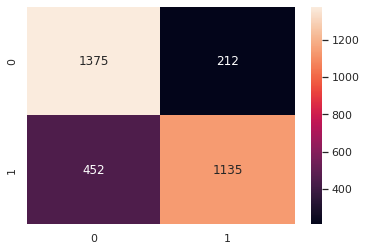

In [62]:
c2 = confusion_matrix(y_test_sub,y2_pred)
sns.heatmap(c2, annot=True, fmt='g')
plt.show()

##### Acurácia do modelo

In [63]:
print(f"accuracy: {accuracy_score(y_test_sub, y2_pred)}")
print(classification_report(y_test_sub, y2_pred))

accuracy: 0.7908002520478891
              precision    recall  f1-score   support

           0       0.75      0.87      0.81      1587
           1       0.84      0.72      0.77      1587

    accuracy                           0.79      3174
   macro avg       0.80      0.79      0.79      3174
weighted avg       0.80      0.79      0.79      3174



Observando a matriz de confusão e o relatório, podemos notar que a SVM conseguiu um desempenho bem próximo do desempenho de uma Rede Neural. A **precisão**, o **recall** e a **acurácia** melhoraram alguns décimos.